In [10]:
import os 
import csv 
from omegaconf import OmegaConf
base_dir = "../../outputs/save_csv"

results = {
    'epochs':[],
    'seed':[],
    'lr':[],
    'loss':[],
} 
for root, dirnames, filenames in os.walk(base_dir):
    if "config.yaml" in filenames:
        flags = OmegaConf.load(os.path.join(root, 'config.yaml'))
        print(flags)
        
        # -------- results
        with open(os.path.join(root, 'results.csv'), newline='') as csvfile:
            delimiter='\t'
            for i, row in enumerate(csv.reader(csvfile, delimiter=delimiter)):
                if i==0:
                    continue
                row = [r.strip() for r in row]
                results['epochs'].append(row[0])
                results['seed'].append(flags.seed)
                results['lr'].append(row[2])
                results['loss'].append(row[1])

{'done': False, 'datetime': '0306_150835', 'save_dir': 'outputs/save_csv/50_seed_4/run_save_csv_0', 'epochs': 50, 'seed': 4}
{'done': False, 'datetime': '0306_150813', 'save_dir': 'outputs/save_csv/40_seed_3/run_save_csv_0', 'epochs': 40, 'seed': 3}
{'done': False, 'datetime': '0306_150738', 'save_dir': 'outputs/save_csv/10_seed_0/run_save_csv_0', 'epochs': 10, 'seed': 0}
{'done': False, 'datetime': '0306_150744', 'save_dir': 'outputs/save_csv/20_seed_1/run_save_csv_0', 'epochs': 20, 'seed': 1}
{'done': False, 'datetime': '0306_150756', 'save_dir': 'outputs/save_csv/30_seed_2/run_save_csv_0', 'epochs': 30, 'seed': 2}


In [19]:
import pandas as pd 
dfs = pd.DataFrame(results)
dfs['lr'] = pd.to_numeric(dfs['lr'])
dfs['loss'] = pd.to_numeric(dfs['loss'])
dfs['epochs'] = pd.to_numeric(dfs['epochs'])
dfs['seed'] = pd.to_numeric(dfs['seed'])
dfs.head(3)

,epochs,seed,lr,loss
0,0,4,0.0001,0.967030
1,1,4,0.0002,0.273616
2,2,4,0.0003,0.324228


<Axes: xlabel='epochs', ylabel='loss'>

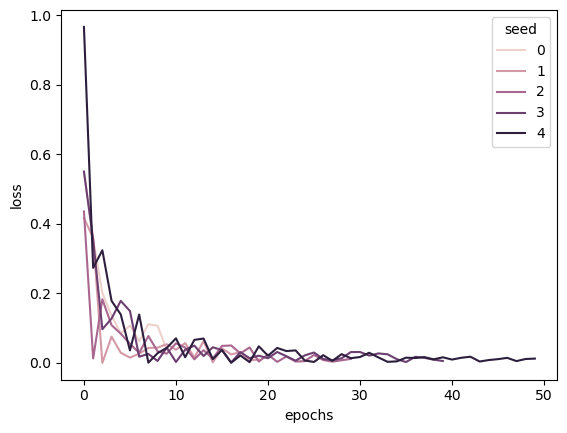

In [20]:
import seaborn as sns 
sns.lineplot(x='epochs', y='loss', data=dfs, hue='seed')

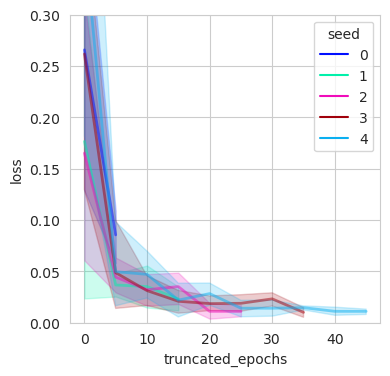

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
dfs['truncated_epochs'] = (dfs['epochs']//5)*5
sns.lineplot(x='truncated_epochs', y='loss', data=dfs, hue='seed', lw=2, alpha=0.5, palette=[
    '#000fff',
    '#00f0aa',
    '#f00bba',
    '#a0000b',
    '#0aaff0',
])
plt.ylim([0, 0.3])
if not os.path.exists("outputs"):
    os.makedirs("outputs")
plt.savefig("outputs/loss.pdf")

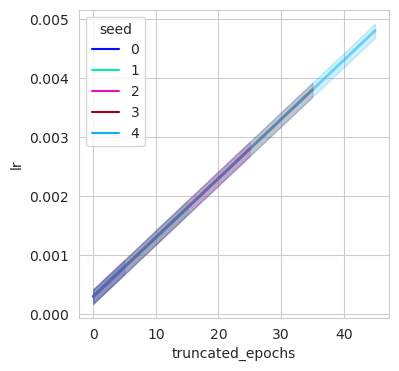

In [45]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
dfs['truncated_epochs'] = (dfs['epochs']//5)*5
sns.lineplot(x='truncated_epochs', y='lr', data=dfs, hue='seed', lw=2, alpha=0.5, palette=[
    '#000fff',
    '#00f0aa',
    '#f00bba',
    '#a0000b',
    '#0aaff0',
])
# plt.ylim([0, 0.3])
if not os.path.exists("outputs"):
    os.makedirs("outputs")
plt.savefig("outputs/lr.pdf")